![image](https://drive.google.com/u/0/uc?id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d&export=download)

# **Taller No. 1 - ISIS4825**
## **Proceso de Aprendizaje Automático e Introducción a la Clasificación**
## **Contenido**
1. [**Objetivos**](#id1)
2. [**Problema**](#id2)
3. [**Importando las librerías necesarias para el laboratorio**](#id3)
4. [**Visualización y Análisis Exploratorio**](#id4)
5. [**Preparación de los Datos**](#id5)
6. [**Modelamiento**](#id6)
7. [**Predicción**](#id7)
8. [**Validación**](#id8)

## **Objetivos**<a name="id1"></a>
- Familiarizarse con las librerías de Scikit-Learn y con el algoritmo de KNN
- Resolver un problema de clasificación multiclase y tomar métricas de desempeño sobre este
## **Problema**<a name="id2"></a>

## **Importando las librerías necesarias para el laboratorio**<a name="id3"></a>

In [ ]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (train_test_split, ShuffleSplit, 
                                     cross_val_score, GridSearchCV)
from sklearn.metrics import (precision_score, recall_score, confusion_matrix, 
                             accuracy_score, f1_score, roc_curve, 
                             precision_recall_curve)

import utils.general as gen

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

## **Visualización y Análisis Exploratorio**<a name="id4"></a>
- Vamos a hacer uso del Dataset `Fashion-MNIST` que consta de 10 clases:
    0. T-Shirt/Top
    1. Trouser
    2. Pullover
    3. Dress
    4. Coat
    5. Sandal
    6. Shirt 
    7. Sneaker
    8. Bag
    9. Ankle Boot
- De igual forma, el dataset tiene 70.000 imágenes en escala de rises con resolución 28x28. Sin embargo, las imágenes ya se encuentran aplanadas con tamaño ed vector 784.

In [ ]:
fashion_mnist = datasets.fetch_openml("Fashion-MNIST")

In [ ]:
data, target = fashion_mnist.data, fashion_mnist.target

In [ ]:
data.shape, target.shape

((70000, 784), (70000,))

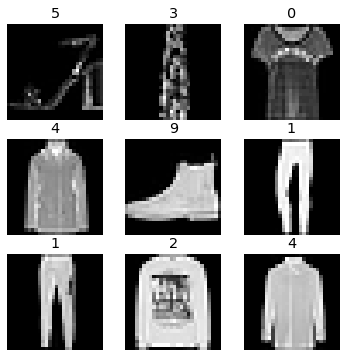

In [ ]:
random_sample = np.random.choice(np.arange(len(data)), 9)
gen.visualize_subplot(
    data[random_sample].reshape(-1, 28, 28),
    target[random_sample],  (3, 3), (6, 6)
)

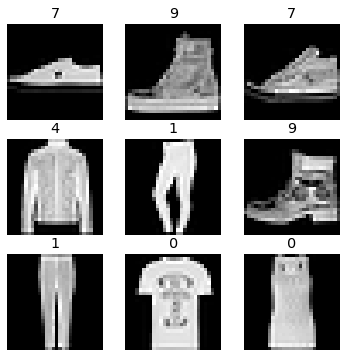

In [ ]:
random_sample = np.random.choice(np.arange(len(data)), 9)
gen.visualize_subplot(
    data[random_sample].reshape(-1, 28, 28),
    target[random_sample],  (3, 3), (6, 6)
)

In [ ]:
target_classes = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", 
                  "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [ ]:
target_distribution = pd.Series(target).value_counts().sort_index()
target_distribution.index = target_classes

In [ ]:
target_distribution

T-Shirt/Top    7000
Trouser        7000
Pullover       7000
Dress          7000
Coat           7000
Sandal         7000
Shirt          7000
Sneaker        7000
Bag            7000
Ankle Boot     7000
dtype: int64

## **Preparación de los Datos**<a name="id5"></a>
- Dado que estamos trabajando con modelos de Machine Learning superficial, vamos a necesitar que todas nuestras imágenes sean convertidas a vectores, si es que aún no lo son.

### **Tratamiento de Imágenes**
- En este caso, nuestras imágenes son vectores, sin embargo vamos a ver cómo hacer su transformación vector-imagen e imagen-vector

In [ ]:
sample_img = data[0].reshape(28, 28)
sample_target = target[0]

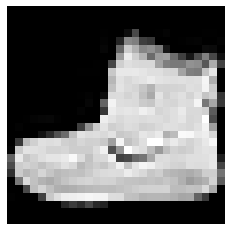

In [ ]:
gen.imshow(sample_img, color=False)

In [ ]:
sample_img.shape

(28, 28)

In [ ]:
sample_img = sample_img.flatten()

In [ ]:
sample_img.shape

(784,)

### **Train Set, Validation Set, Test Set**
- Generalmente, en el mundo del computer vision, se hace la siguiente partición de datasets:
    - Train Data:
        - Train Set
        - Validation Set
    - Test Data:
        - Test Set
- La partición de los datasets la podemos hacer de varias formas, pero en esta ocasión veremos la partición por índices y por contenido.

#### **Partición por Índice**
- Buscamos dividir nuestro dataset a partir de sus índices.

In [ ]:
rnd_data = np.random.choice(np.arange(len(data)), 10000)
full_data = data.copy()
full_target = target.copy()
data = data[rnd_data]
target = target[rnd_data]

- Aquí usamos el `random_state` para definir una semilla de aleatoriedad para que los grupos generados se mantengan siempre.

In [ ]:
ss_full_train_test = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1234)

In [ ]:
for full_train_index, test_index in ss_full_train_test.split(data):
    pass

In [ ]:
full_train_index

array([ 155, 3130, 5727, ..., 7948, 1064, 1750])

In [ ]:
test_index

array([6899,  214, 5124, ..., 9211, 9399, 9295])

In [ ]:
full_train_set, test_set = ((data[full_train_index], target[full_train_index]), 
                            (data[test_index], target[test_index]))

In [ ]:
ss_train_val = ShuffleSplit(n_splits=10, test_size=0.2, random_state=5678)

In [ ]:
for train_index, val_index in ss_train_val.split(full_train_set[0]):
    pass

In [ ]:
train_set, val_set = ((full_train_set[0][train_index], full_train_set[1][train_index]), 
                      (full_train_set[0][val_index], full_train_set[1][val_index]))

In [ ]:
X_train, y_train = train_set[0], train_set[1]
X_val, y_val = val_set[0], val_set[1]
X_test, y_test = test_set[0], test_set[1]

In [ ]:
X_train.shape, y_train.shape

((6400, 784), (6400,))

In [ ]:
X_val.shape, y_val.shape

((1600, 784), (1600,))

In [ ]:
X_test.shape, y_test.shape

((2000, 784), (2000,))

- Generemos una muestra de imágenes por cada set generado.

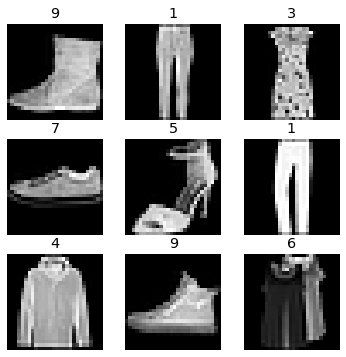

In [ ]:
random_sample = np.random.choice(np.arange(len(X_train)), 9)
gen.visualize_subplot(
    X_train[random_sample].reshape(-1, 28, 28),
    y_train[random_sample],  (3, 3), (6, 6)
)

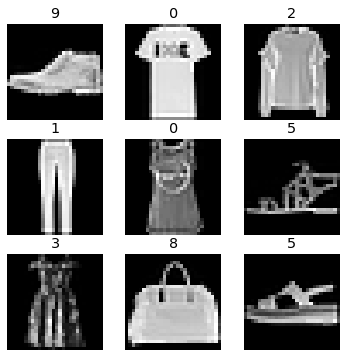

In [ ]:
random_sample = np.random.choice(np.arange(len(X_val)), 9)
gen.visualize_subplot(
    X_val[random_sample].reshape(-1, 28, 28),
    y_val[random_sample],  (3, 3), (6, 6)
)

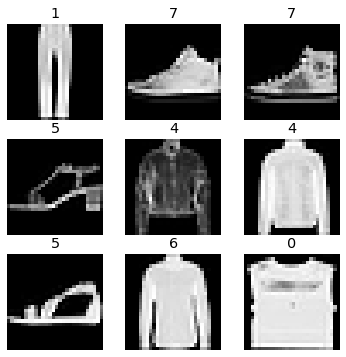

In [ ]:
random_sample = np.random.choice(np.arange(len(X_test)), 9)
gen.visualize_subplot(
    X_test[random_sample].reshape(-1, 28, 28),
    y_test[random_sample],  (3, 3), (6, 6)
)

#### **Partición por Contenido**
- Aquí no buscamos partir nuestro dataset a partir de los índices que contiene, sino por el cuerpo de la data.

In [ ]:
full_X_train, X_test, full_y_train, y_test = train_test_split(data, target, 
                                                              test_size=0.2, 
                                                              random_state=1234)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(full_X_train, full_y_train, 
                                                  test_size=0.2, 
                                                  random_state=1234)

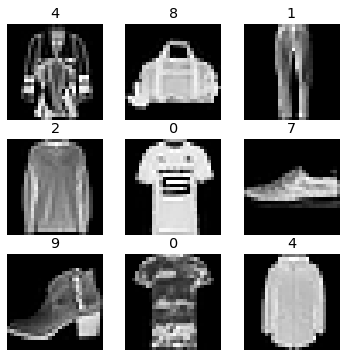

In [ ]:
random_sample = np.random.choice(np.arange(len(X_train)), 9)
gen.visualize_subplot(
    X_train[random_sample].reshape(-1, 28, 28),
    y_train[random_sample],  (3, 3), (6, 6)
)

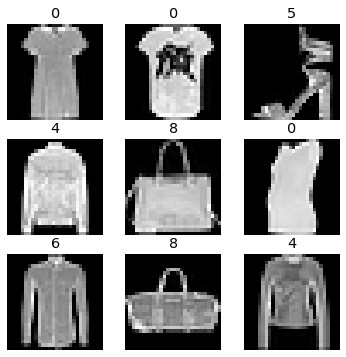

In [ ]:
random_sample = np.random.choice(np.arange(len(X_val)), 9)
gen.visualize_subplot(
    X_val[random_sample].reshape(-1, 28, 28),
    y_val[random_sample],  (3, 3), (6, 6)
)

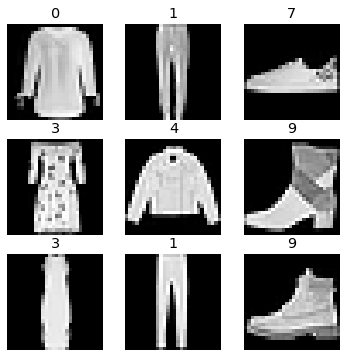

In [ ]:
random_sample = np.random.choice(np.arange(len(X_test)), 9)
gen.visualize_subplot(
    X_test[random_sample].reshape(-1, 28, 28),
    y_test[random_sample],  (3, 3), (6, 6)
)

## **Modelamiento**<a name="id6"></a>
- A la hora de modelar los datos, buscamos un algoritmo que generalice la forma como los datos se comportan y con base a ello, pueda generar predicciones.

### **K-Nearest-Neighbors**
- En este caso, vamos a utilizar un algoritmo de modelado no lineal basado en vecindades o *neighborhoods*. Se trata de *K-Nearest Neighbors*.

![image](https://miro.medium.com/max/3544/1*4F-q86XFr2-EsaAcz0Zu5A.png)

> Tomado de [Towards Data Science](https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55)

- Este espacio lo tomamos, generalmente, para buscar algoritmos que puedan ser usados para modelar, y una vez encontrados, exploramos los hiperparámetros que podamos usar para mejorar los resultados de nuestros algoritmos.

In [ ]:
KNeighborsClassifier?

In [ ]:
knn_clf = KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

## **Predicción**<a name="id7"></a>
- En esta etapa nos concentramos en hacer nuestras predicciones y validarlas con el ojo.

In [ ]:
random_sample = np.random.choice(np.arange(len(X_test)), 9)
y_pred = knn_clf.predict(X_test[random_sample])

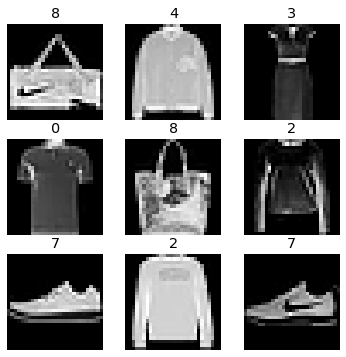

In [ ]:
gen.visualize_subplot(
    X_test[random_sample].reshape(-1, 28, 28),
    y_pred, (3, 3), (6, 6)
)

## **Validación**<a name="id8"></a>
- En esta etapa de evaluación realizamos el proceso de toma de métricas. Por lo tanto, dado que estamos resolviendo un problema de clasificación, vamos a usar la matriz de confusión y las siguientes métricas globales:

- Precision: $\frac{TP}{TP + FP}$

- Cobertura: $\frac{TP}{TP + FN}$ (Recall, Sensitivity)

- Accuracy score: $\frac{TP + TN}{TP + TN + FP + FN}$

- F1 score: $\frac{TP}{TP + \frac{FN + FP}{2}}$ (Harmonic Mean)

In [ ]:
y_pred = knn_clf.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
pd.DataFrame(conf_matrix)

,0,1,2,3,4,5,6,7,8,9
0,175,1,10,5,0,0,11,0,0,0
1,0,181,2,5,0,0,0,0,0,0
2,4,0,154,1,21,0,28,0,0,0
3,13,2,3,150,11,0,4,0,3,0
4,3,1,23,5,142,0,22,0,1,0
5,1,0,0,0,0,159,3,45,0,13
6,51,1,30,3,10,0,89,0,2,0
7,0,0,0,0,0,1,0,182,0,12
8,1,0,8,1,2,2,2,3,204,1
9,0,0,0,0,0,0,1,5,0,187


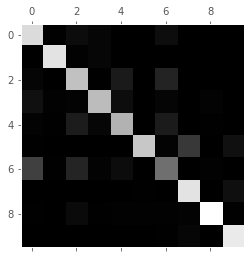

In [ ]:
plt.matshow(conf_matrix, cmap="gray")
plt.grid(0)
plt.show()

In [ ]:
np.trace(conf_matrix)

1623

In [ ]:
norm_conf_mat = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mat, 0)

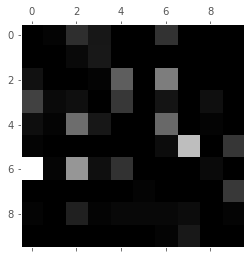

In [ ]:
plt.matshow(norm_conf_mat, cmap="gray")
plt.grid(0)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.8115

In [ ]:
precision_score(y_test, y_pred, average="weighted")

0.8188520597177541

In [ ]:
recall_score(y_test, y_pred, average="weighted")

0.8115

In [ ]:
f1_score(y_test, y_pred, average="weighted")

0.8103918457736391

In [ ]:
cross_val_score(knn_clf, X_val, y_val, cv=4, scoring="accuracy")

array([0.7675, 0.7425, 0.75  , 0.8   ])

In [ ]:
param_grid = [
    {"n_neighbors": np.arange(10, 51, 10), "algorithm": ["auto", "ball_tree", 
                                                         "kd_tree"]},
    {"weights": ["uniform", "distance"]}
]

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring="accuracy", 
                           cv=4, return_train_score=True)

In [ ]:
grid_search.fit(X_val, y_val)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                          'n_neighbors': array([10, 20, 30, 40, 50])},
                         {'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [ ]:
grid_search.best_score_

0.7699999999999999

In [ ]:
knn_clf = grid_search.best_estimator_

In [ ]:
random_sample = np.random.choice(np.arange(len(X_test)), 9)
y_pred = knn_clf.predict(X_test[random_sample])

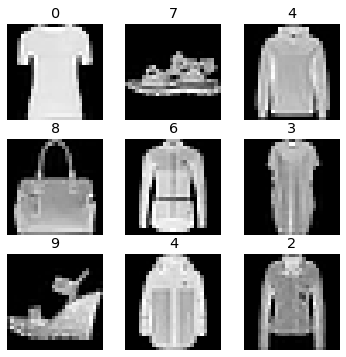

In [ ]:
gen.visualize_subplot(
    X_test[random_sample].reshape(-1, 28, 28),
    y_pred,  (3, 3), (6, 6)
)